# Research Question

As a Data Scientist, I would like to investigate which of the three electric car models, the BlueCar, the Utilib, and the Utilib 14, is the most popular on a weekend and the day it is in high demand.

## Data Preparation

In [52]:
# load Python libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# load & preview the dataset
autolib_dataset = pd.read_csv('autolib_daily_events_postal_code.csv')
autolib_dataset.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [54]:
#create a dataset that contains the Autolib data recorded only on weekends
autolib = autolib_dataset.loc[autolib_dataset['day_type'] == 'weekend']

# preview the dataset
autolib.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,2,2,25,25,41,39


In [55]:
# drop the 'day_type' column since it is redundant now
autolib = autolib.drop(columns='day_type')

In [56]:
# replace "6" with "Sunday" and "5" with "Saturday"

autolib.loc[autolib['dayOfWeek'] == 6, 'dayOfWeek'] = 'Sunday'
autolib.loc[autolib['dayOfWeek'] == 5, 'dayOfWeek'] = 'Saturday'

autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,1/6/2018,1437,Saturday,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,Sunday,180,180,2,2,10,9,34,34
12,75001,1/13/2018,1440,Saturday,224,223,2,2,15,15,38,38
13,75001,1/14/2018,1440,Sunday,193,193,2,2,12,12,22,20
19,75001,1/20/2018,1439,Saturday,217,217,2,2,25,25,41,39


In [57]:
# check the shape (size) of the dataset
autolib.shape

## we have 4,541 rows and 12 columns

(4541, 12)

In [58]:
# check the info on the Autolib dataset
autolib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541 entries, 5 to 16082
Data columns (total 12 columns):
Postal code               4541 non-null int64
date                      4541 non-null object
n_daily_data_points       4541 non-null int64
dayOfWeek                 4541 non-null object
BlueCars_taken_sum        4541 non-null int64
BlueCars_returned_sum     4541 non-null int64
Utilib_taken_sum          4541 non-null int64
Utilib_returned_sum       4541 non-null int64
Utilib_14_taken_sum       4541 non-null int64
Utilib_14_returned_sum    4541 non-null int64
Slots_freed_sum           4541 non-null int64
Slots_taken_sum           4541 non-null int64
dtypes: int64(10), object(2)
memory usage: 461.2+ KB


In [59]:
# rename the columns to improve consistency
autolib = autolib.rename(columns={
    'Postal code' : 'postal_code',
    'dayOfWeek' : 'day_of_week',
    'BlueCars_taken_sum' : 'bluecars_taken_sum',
    'BlueCars_returned_sum' : 'bluecars_returned_sum',
    'Utilib_taken_sum' : 'utilib_taken_sum',
    'Utilib_returned_sum' : 'utilib_returned_sum',
    'Utilib_14_taken_sum' : 'utilib_14_taken_sum',
    'Utilib_14_returned_sum' : 'utilib_14_returned_sum',
    'Slots_freed_sum' : 'slots_freed_sum',
    'Slots_taken_sum' : 'slots_taken_sum'
})

In [60]:
# check columns and their corresponding data type
autolib.dtypes

postal_code                int64
date                      object
n_daily_data_points        int64
day_of_week               object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object

In [61]:
# check for null values
autolib.isna().sum()

## there are no null values in any column

postal_code               0
date                      0
n_daily_data_points       0
day_of_week               0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [62]:
# check for duplicates
isDuplicated = autolib[autolib.duplicated()]
print(isDuplicated)

# "Empty DataFrame" means that there are no duplicated values in the dataset

Empty DataFrame
Columns: [postal_code, date, n_daily_data_points, day_of_week, bluecars_taken_sum, bluecars_returned_sum, utilib_taken_sum, utilib_returned_sum, utilib_14_taken_sum, utilib_14_returned_sum, slots_freed_sum, slots_taken_sum]
Index: []


In [63]:
# investigate the dataset's descriptive statistics
autolib.describe()

# points of interest to note:


,postal_code,n_daily_data_points,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000
mean,88794.686633,1434.694781,151.090068,152.029289,4.393085,4.414666,10.129707,10.184761,26.909712,26.970932
std,7646.521844,20.819324,218.565642,221.140337,6.747905,6.834645,14.821601,14.973810,61.357605,61.531368
min,75001.000000,1318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1440.000000,25.000000,24.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,59.000000,58.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000
75%,93400.000000,1440.000000,156.000000,157.000000,5.000000,5.000000,11.000000,12.000000,6.000000,6.000000
max,95880.000000,1440.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


### Outliers

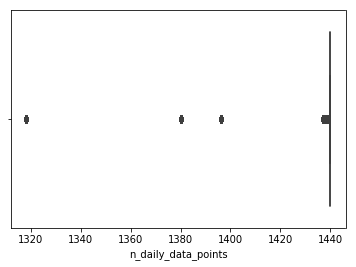

In [100]:
# using a boxplot, find outliers in 'n_daily_data_points'

sns.boxplot(x = autolib['n_daily_data_points'])

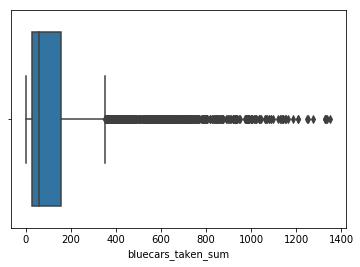

In [98]:
# using a boxplot, find outliers in 'bluecars_taken_sum'

sns.boxplot(x = autolib['bluecars_taken_sum'])

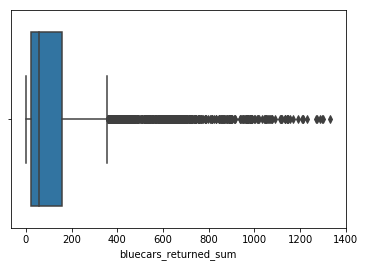

In [101]:
# using a boxplot, find outliers in 'bluecars_returned_sum'

sns.boxplot(x = autolib['bluecars_returned_sum'])

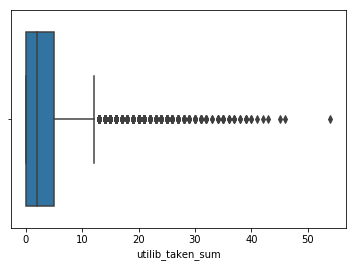

In [102]:
# using a boxplot, find outliers in 'utilib_taken_sum'

sns.boxplot(x = autolib['utilib_taken_sum'])

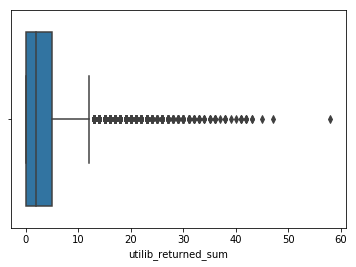

In [103]:
# using a boxplot, find outliers in 'utilib_returned_sum'

sns.boxplot(x = autolib['utilib_returned_sum'])

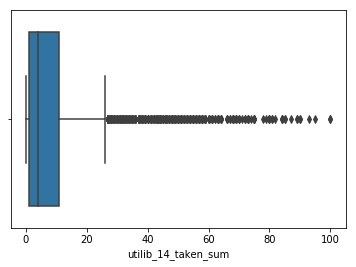

In [104]:
# using a boxplot, find outliers in 'utilib_14_taken_sum'

sns.boxplot(x = autolib['utilib_14_taken_sum'])

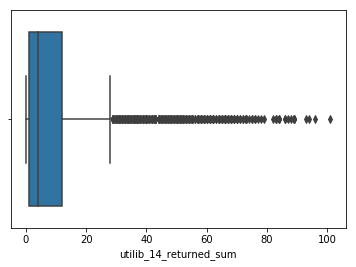

In [105]:
# using a boxplot, find outliers in 'utilib_14_returned_sum'

sns.boxplot(x = autolib['utilib_14_returned_sum'])

## Data Analysis

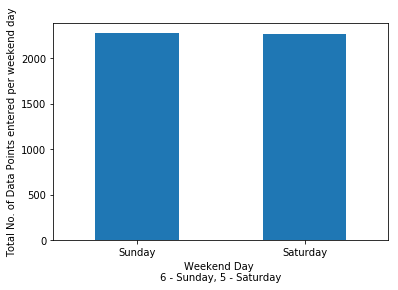

Sunday      2274
Saturday    2267
Name: day_of_week, dtype: int64


In [91]:
# is there a significant difference between the days?
autolib.day_of_week.value_counts().plot(kind='bar', rot=0)
plt.xlabel("Weekend Day \n6 - Sunday, 5 - Saturday")
plt.ylabel("Total No. of Data Points entered per weekend day")
plt.show()
print(autolib.day_of_week.value_counts())

## there seems to be no significant difference

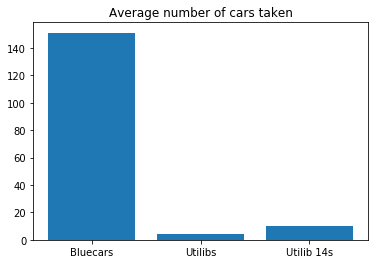

In [82]:
# find the average number of cars taken
carsAvg =[autolib.bluecars_taken_sum.mean(),
            autolib.utilib_taken_sum.mean(),
           autolib.utilib_14_taken_sum.mean()]
avgCarLabels = ['Bluecars', 'Utilibs', 'Utilib 14s']

plt.bar(avgCarLabels, carsAvg)
plt.title("Average number of cars taken")
plt.show()

## this shows that the Bluecars are the most popular and the Utilibs are the least popular

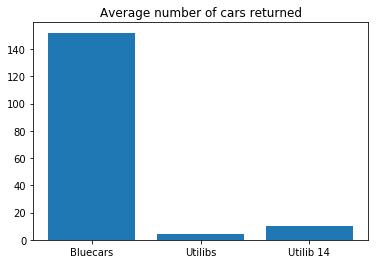

In [84]:
# total number of cars returned
returnedAvg = [autolib.bluecars_returned_sum.mean(),
              autolib.utilib_returned_sum.mean(),
              autolib.utilib_14_returned_sum.mean()]
returnedLabels = ['Bluecars', 'Utilibs', 'Utilib 14']

plt.bar(returnedLabels, returnedAvg)
plt.title('Average number of cars returned')
plt.show()

## again, we see that the Bluecars have the highest number of cars returned while the Utilib shows the least number.

In [16]:
# How many distinct postal codes are in this dataset?
postalCodes = autolib.postal_code.unique()
print(len(postalCodes))

104


In [116]:
# number of unique dates
len(autolib.date.unique())

44

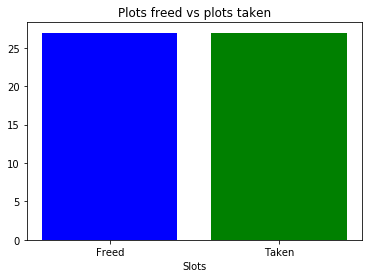

Slots freed: 278
Slots taken: 282


In [127]:
# average number of recharging slots freed vs that of slots taken
freedAvg = autolib.slots_freed_sum.mean()
takenAvg = autolib.slots_taken_sum.mean()

plt.bar('Freed', freedAvg, color='blue')
plt.bar('Taken', takenAvg, color='green')
plt.xlabel("Slots")
plt.title('Plots freed vs plots taken')
plt.show()


print("Slots freed:", autolib.slots_freed_sum.value_counts().count())
print("Slots taken:", autolib.slots_taken_sum.value_counts().count())

## no significant difference

In [137]:
# split dataset into two, one for Saturday and one for Sunday
saturday = autolib.loc[autolib['day_of_week'] == "Saturday"] 
sunday = autolib.loc[autolib['day_of_week'] == "Sunday"]

# check to ensure that they don't have what they're not supposed to contain
# e.g., the saturday dataset is not supposed to contain any Sunday records and vice versa
noSat = saturday.loc[saturday['day_of_week'] != "Saturday"]
noSun = sunday.loc[sunday['day_of_week'] != "Sunday"]
## no record out of place

print(noSat)
print(noSun)

# drop the 'day_of_week' column in both datasets since it has now become redundant
saturday = saturday.drop(columns='day_of_week')
sunday = sunday.drop(columns='day_of_week')


Empty DataFrame
Columns: [postal_code, date, n_daily_data_points, day_of_week, bluecars_taken_sum, bluecars_returned_sum, utilib_taken_sum, utilib_returned_sum, utilib_14_taken_sum, utilib_14_returned_sum, slots_freed_sum, slots_taken_sum]
Index: []
Empty DataFrame
Columns: [postal_code, date, n_daily_data_points, day_of_week, bluecars_taken_sum, bluecars_returned_sum, utilib_taken_sum, utilib_returned_sum, utilib_14_taken_sum, utilib_14_returned_sum, slots_freed_sum, slots_taken_sum]
Index: []


Index(['postal_code', 'date', 'n_daily_data_points', 'bluecars_taken_sum',
       'bluecars_returned_sum', 'utilib_taken_sum', 'utilib_returned_sum',
       'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

In [141]:
# mean number of cars taken per weekend day
satBluecars = saturday.bluecars_taken_sum.mean()
sunBluecars = sunday.bluecars_taken_sum.mean()
satUtilib = saturday.utilib_taken_sum.mean()
sunUtilib = sunday.utilib_taken_sum.mean()
satUtilib14 = saturday.utilib_14_taken_sum.mean()
sunUtilib14 = sunday.utilib_14_taken_sum.mean()

print("Bluecars on Saturday:", round(satBluecars, 2))
print("Bluecars on Sunday:", round(sunBluecars, 2))
print("Utilibs on Saturday:", round(satUtilib, 2))
print("Utilibs on Sunday:", round(sunUtilib, 2))
print("Utilib 14s on Saturday:", round(satUtilib14, 2))
print("Utilib 14s on Sunday:", round(sunUtilib14, 2))

## Bluecars are the most popular cars and are taken more on Saturdays than on Sundays

Bluecars on Saturday: 156.12
Bluecars on Sunday: 146.07
Utilibs on Saturday: 4.51
Utilibs on Sunday: 4.28
Utilib 14s on Saturday: 10.43
Utilib 14s on Sunday: 9.83


In [117]:
autolib.head()

,postal_code,date,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
5,75001,1/6/2018,1437,Saturday,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,Sunday,180,180,2,2,10,9,34,34
12,75001,1/13/2018,1440,Saturday,224,223,2,2,15,15,38,38
13,75001,1/14/2018,1440,Sunday,193,193,2,2,12,12,22,20
19,75001,1/20/2018,1439,Saturday,217,217,2,2,25,25,41,39


# Conclusion

# Note to the TM
I am unable to complete the work due to personal issues. I promise to redo and resubmit this IP as soon as I can.